<a href="https://colab.research.google.com/github/jiieunx/datacampus/blob/master/%ED%97%88%EA%B7%B8%EC%9D%BC%EC%9E%90%EB%A6%AC_%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C_0824.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_excel('허그일자리.xlsx')
df

In [ ]:
lists=df['CONSULT_CONT'].tolist()
len(lists)

In [ ]:
!apt-get update 
!apt-get install g++ openjdk-8-jdk python-dev python3-dev 
!pip3 install JPype1-py3 
!pip3 install konlpy

!JAVA_HOME="C:\Program Files\Java\jdk-14.0.2"
#해야함

In [ ]:
!pip install customized_konlpy
from ckonlpy.tag import Twitter


In [ ]:
!pip install customized_konlpy
from ckonlpy.tag import Twitter

from collections import Counter
#from konlpy.tag import Twitter

twt = Twitter()
twt.add_dictionary(['허그일자리', '직업훈련', '사후관리', '취업알선','집단상담','경제적','안정적','긍정적','참여자','보호위원','허그일자리사업','구직활동','특이사항','적극적','위문물품','취업박람회','대형면허'], 'Noun') #사용자사전
noun=[]



for i in range(1350):
  try:

  
    tmp=twt.nouns(lists[i])
    stopword=['통해','위해','대한','생으로','고취','다시','참석','맞이','수업','필요','시간','크게','중임','제적','실시','안내','대해','도록','까지','전함','이후','중이','로서','때문','매우','제대로','지금','또힌','자로','지난','오늘','자임','관리','지원','상태','결연','진행','가지','나눔','본인','행사','과정','금일','마련','향후','상황','이야기','위문물품','기반','면서','연락','예정',#의미없는말 
              '허그','일자리','허그일자리사업','허그일자리','멘토링','집단상담','취업','참여','활동','현재','사업','참여자','대상자','보호위원','직업','생활','프로그램','수료식','취업박람회','성공','유선','관련', '모습','설명','훈련','명절','학과','근무','운전면허','입교',#활동이나 행사등 
              '독려', '당부','격려','근속','확인','지속','자녀','근로']# 상담자가 한말    
   # stopword=['통해','위해','대한','생으로','고취','다시','맞이','크게','중임','대해','전함','이후','중이','로서','때문','매우','제대로','지금','또힌','자로','지난','오늘','자임','관리','지원','상태','결연','진행','가지','나눔','본인','행사','과정','금일', #의미없는말 
          #    '허그','일자리','취업','멘토링','상담','참여','활동','현재','집단상담','훈련','사업','참여자','대상자','보호','직업','위원','생활','프로그램','수료식', #활동이나 행사등 
           #   '독려', '당부','격려']# 상담자가 한말    

    #stopword=['통해','위해','대한','생으로','고취','다시','맞이','크게','중임','대해','전함','이후','중이','로서','때문','매우','제대로','지금','또힌','자로','지난','오늘','자임','관리','지원','상태','결연','진행','가지','나눔','본인','행사','과정','금일', #의미없는말 
    #          '허그','일자리','멘토링','활동','현재','사업','참여자','대상자','생활', #활동이나 행사등 
     #         '독려', '당부','격려']# 상담자가 한말  
              #활동 빼면 안될것같다 그 활동에 대한 내용어쨌는지 나와야하니까 넣을 활동과 ㅎ뺄활동 정하기 
    noun += [x for x in tmp if len(x)>1 if x not in stopword]
    
    #noun += [x for x in tmp if len(x)>1]

  except:
    print('except')
            


In [ ]:
count = Counter(noun)
noun_list = count.most_common(28) 
words_E = dict(count.most_common(28)) 
for v in noun_list:
    print(v)            

print('끝')

In [ ]:
from wordcloud import WordCloud 

import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
%matplotlib inline

import matplotlib
from IPython.display import set_matplotlib_formats
matplotlib.rc('font',family = 'Malgun Gothic')

set_matplotlib_formats('retina')

matplotlib.rc('axes',unicode_minus = False)



In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq


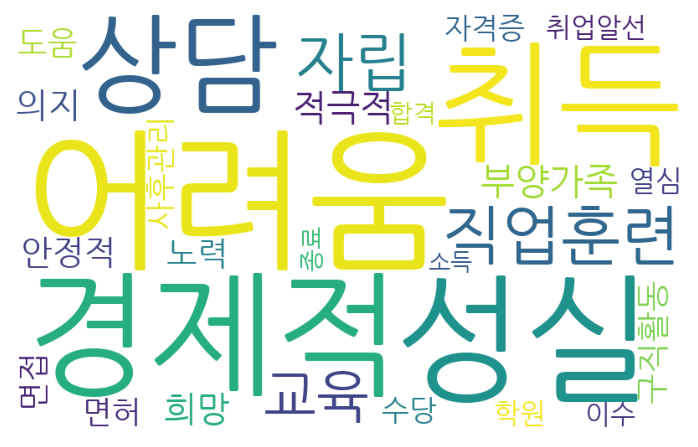

In [ ]:
#from wordcloud import WordCloud,STOPWORDS
from wordcloud import WordCloud
import matplotlib.pyplot as plt


#stopwords=['허그', '일자리','당부','통해','위해','대한','생으로','고취','다시','맞이','크게','중임','대해','전함','이후','중이','로서','때문','매우','제대로','지금','또힌','자로','지난','오늘','현재','자임'
      #    ,'향후','계속','전달','집단','상담','멘토링',]
#wc = WordCloud(width=1000, height=600, background_color="white", random_state=0, font_path=r'c:\Windows\Fonts\malgun.ttf')
#wc = WordCloud( width=1000, height=600, background_color="white", random_state=0, max_words=40, stopwords=stopwords, font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate_from_frequencies(dict(noun_list))

wc = WordCloud( width=800, height=500, background_color="white", random_state=0, font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate_from_frequencies(dict(noun_list))



#lt.imshow(wc.generate(text))
plt.imshow(wc)
plt.axis("off")
plt.show()

wc.to_file('허그일자리_워드클라우드.png')